# Stitch data super fast

In [ ]:
import pipapr
import matplotlib.pyplot as plt


Let's start by parsing a data-set:

In [32]:
path = '../../../tests/data/apr'
tiles = pipapr.tileParser(path=path, ftype='apr', frame_size=512)


**********  PARSING DATA **********
../../../tests/data/apr
Tiles are of type apr.
13 tiles were detected.
4 rows and 4 columns.
***********************************



The data-set can then be quickly displayed by using the parser module. The parser can already display

In [68]:
stitcher_expected = pipapr.tileStitcher(tiles, overlap_h=25, overlap_v=25)
stitcher_expected.compute_expected_registration()

We provide a lazy reconstructor with the stitcher to display a cross-section (or a max projection) of stitched data-set along any given dimension:

Merging: 100%|██████████| 13/13 [00:00<00:00, 60.08it/s]


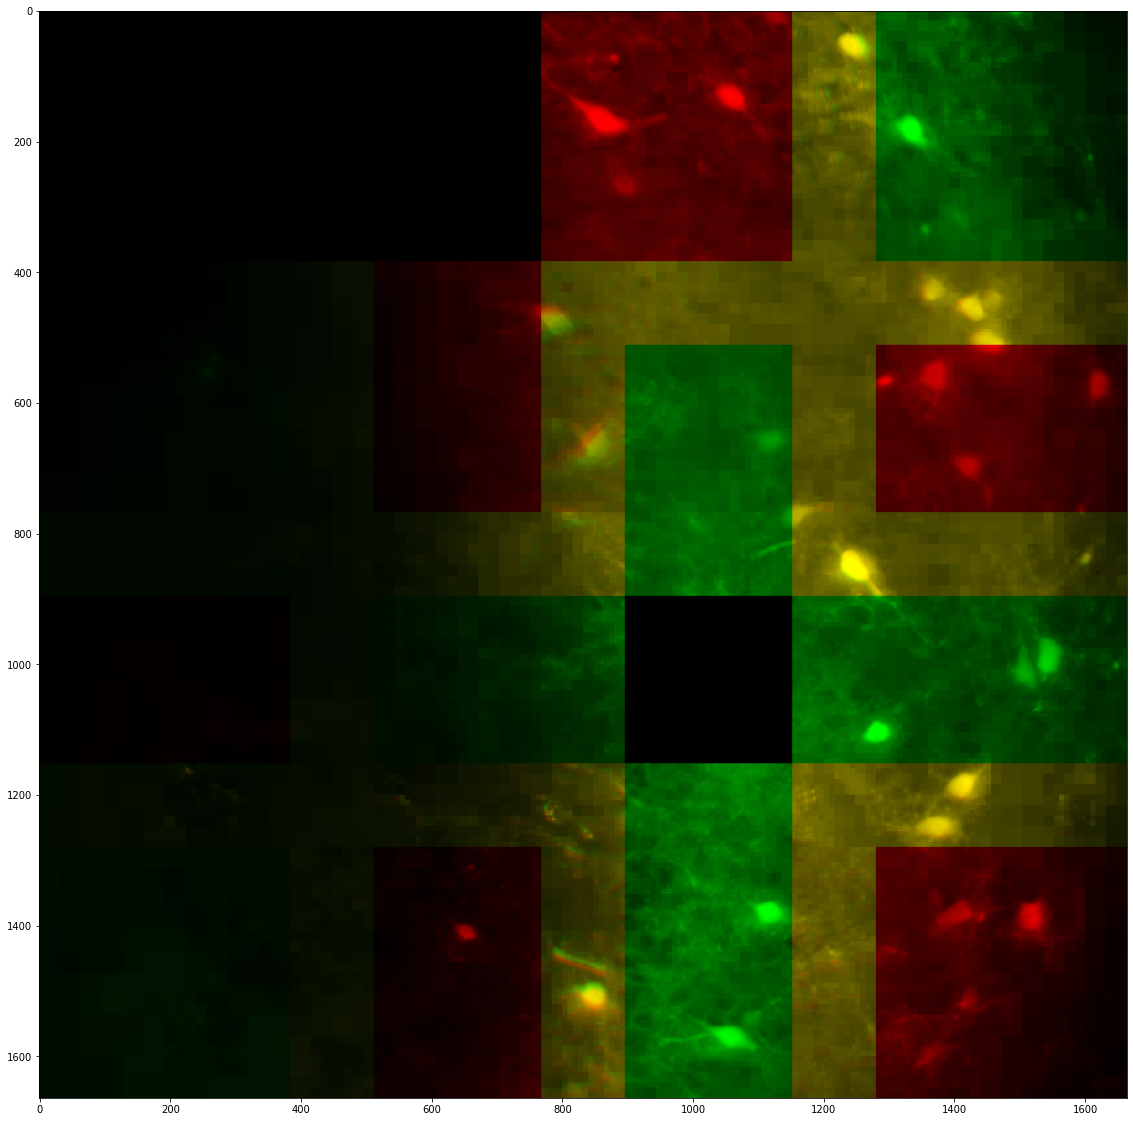

In [69]:
_ = stitcher_expected.reconstruct_slice(color=True, n_proj=10)
fig = plt.gcf()
fig.set_figheight(20)
fig.set_figwidth(20)

Computing cross-correlations: 100%|██████████| 13/13 [00:00<00:00, 108.74it/s]


Effective horizontal overlap: 25.29%
Effective vertical overlap: 24.71%


Merging: 100%|██████████| 13/13 [00:00<00:00, 152.40it/s]


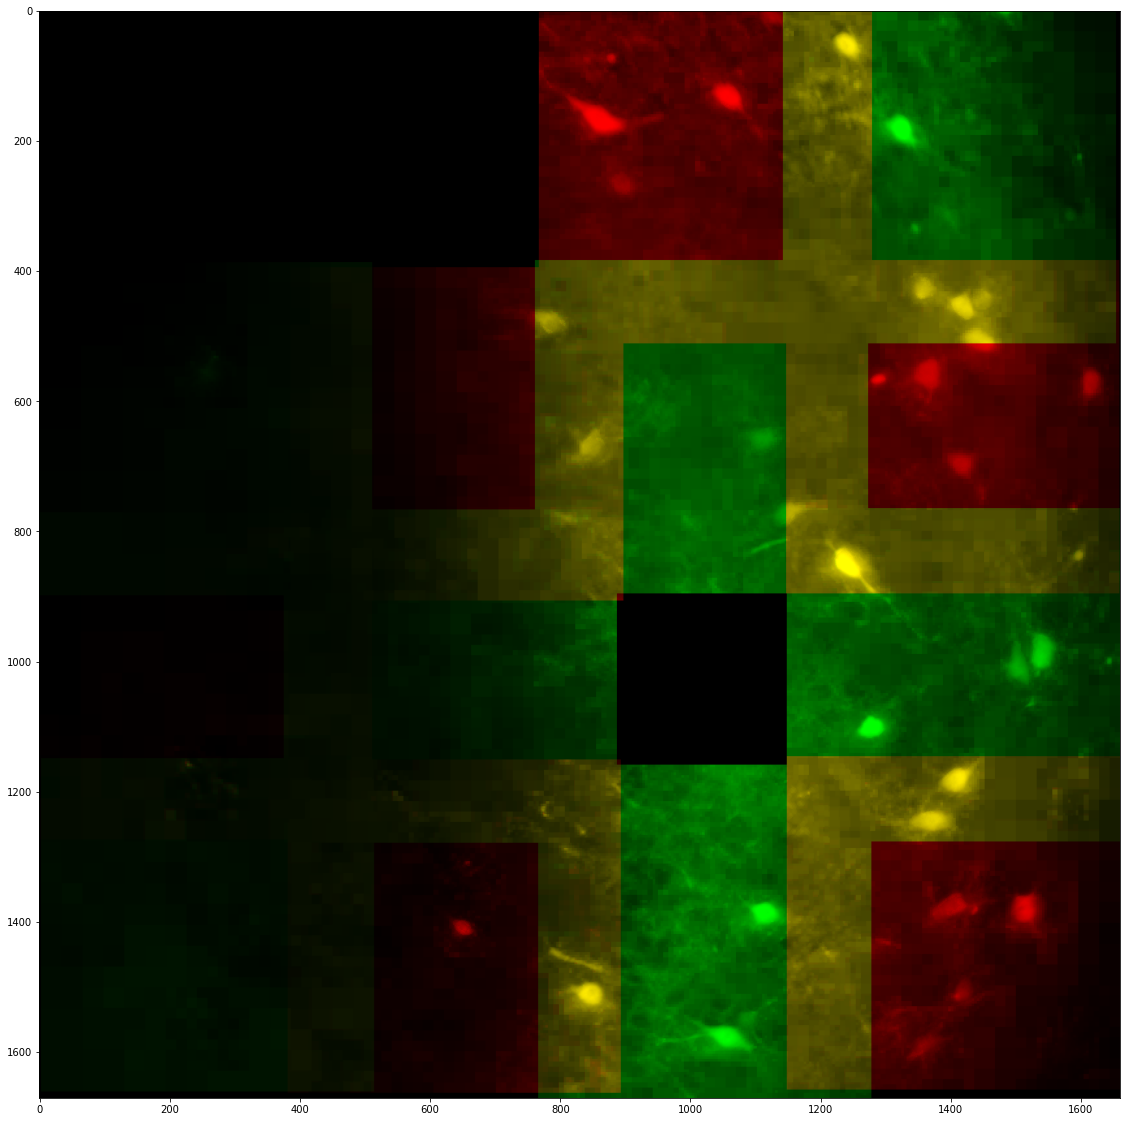

In [76]:
stitcher = pipapr.tileStitcher(tiles, overlap_h=25, overlap_v=25)
stitcher.set_overlap_margin(10)
stitcher.compute_registration()

_ = stitcher.reconstruct_slice(color=True, n_proj=10)
fig = plt.gcf()
fig.set_figheight(20)
fig.set_figwidth(20)

## Before Stitching

Merging: 100%|██████████| 4/4 [00:00<00:00, 12.05it/s]


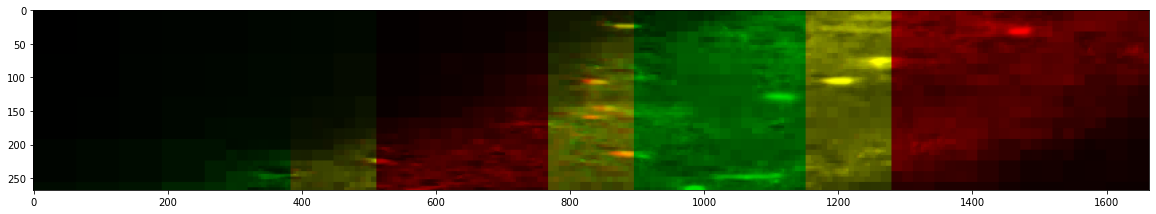

In [77]:
_ = stitcher_expected.reconstruct_slice(dim=1, loc=650, color=True, n_proj=10)
fig = plt.gcf()
fig.set_figheight(20)
fig.set_figwidth(20)

## After Stitching

Merging: 100%|██████████| 4/4 [00:00<00:00, 42.75it/s]


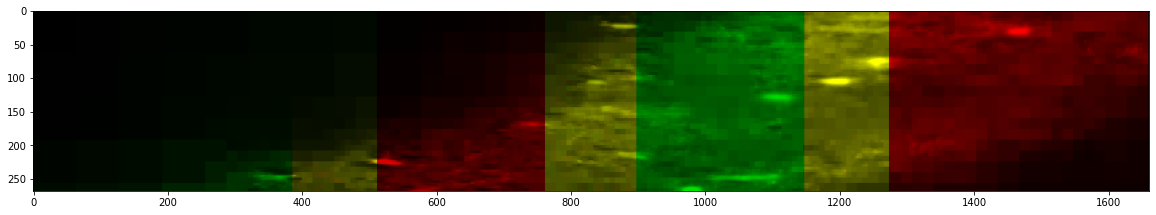

In [75]:
_ = stitcher.reconstruct_slice(dim=1, loc=650, color=True, n_proj=10)
fig = plt.gcf()
fig.set_figheight(20)
fig.set_figwidth(20)

## Before stitching

Merging: 100%|██████████| 6/6 [00:00<00:00,  9.12it/s]


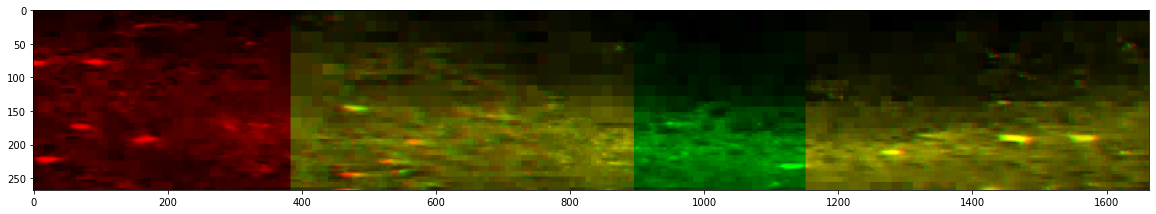

In [80]:
_ = stitcher_expected.reconstruct_slice(dim=2, loc=800, color=True, n_proj=10)
fig = plt.gcf()
fig.set_figheight(20)
fig.set_figwidth(20)

## After Stitching

Merging: 100%|██████████| 6/6 [00:00<00:00, 36.35it/s]


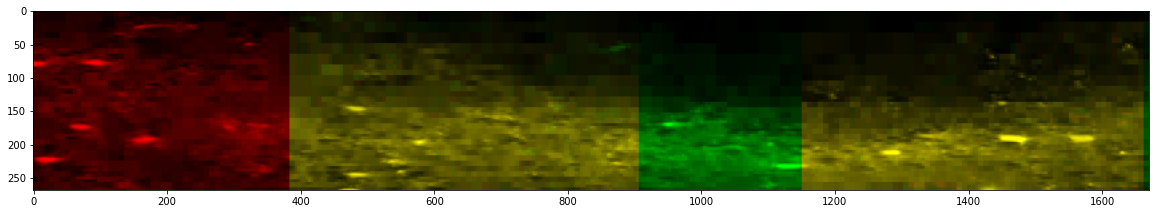

In [79]:
_ = stitcher.reconstruct_slice(dim=2, loc=800, color=True, n_proj=10)
fig = plt.gcf()
fig.set_figheight(20)
fig.set_figwidth(20)


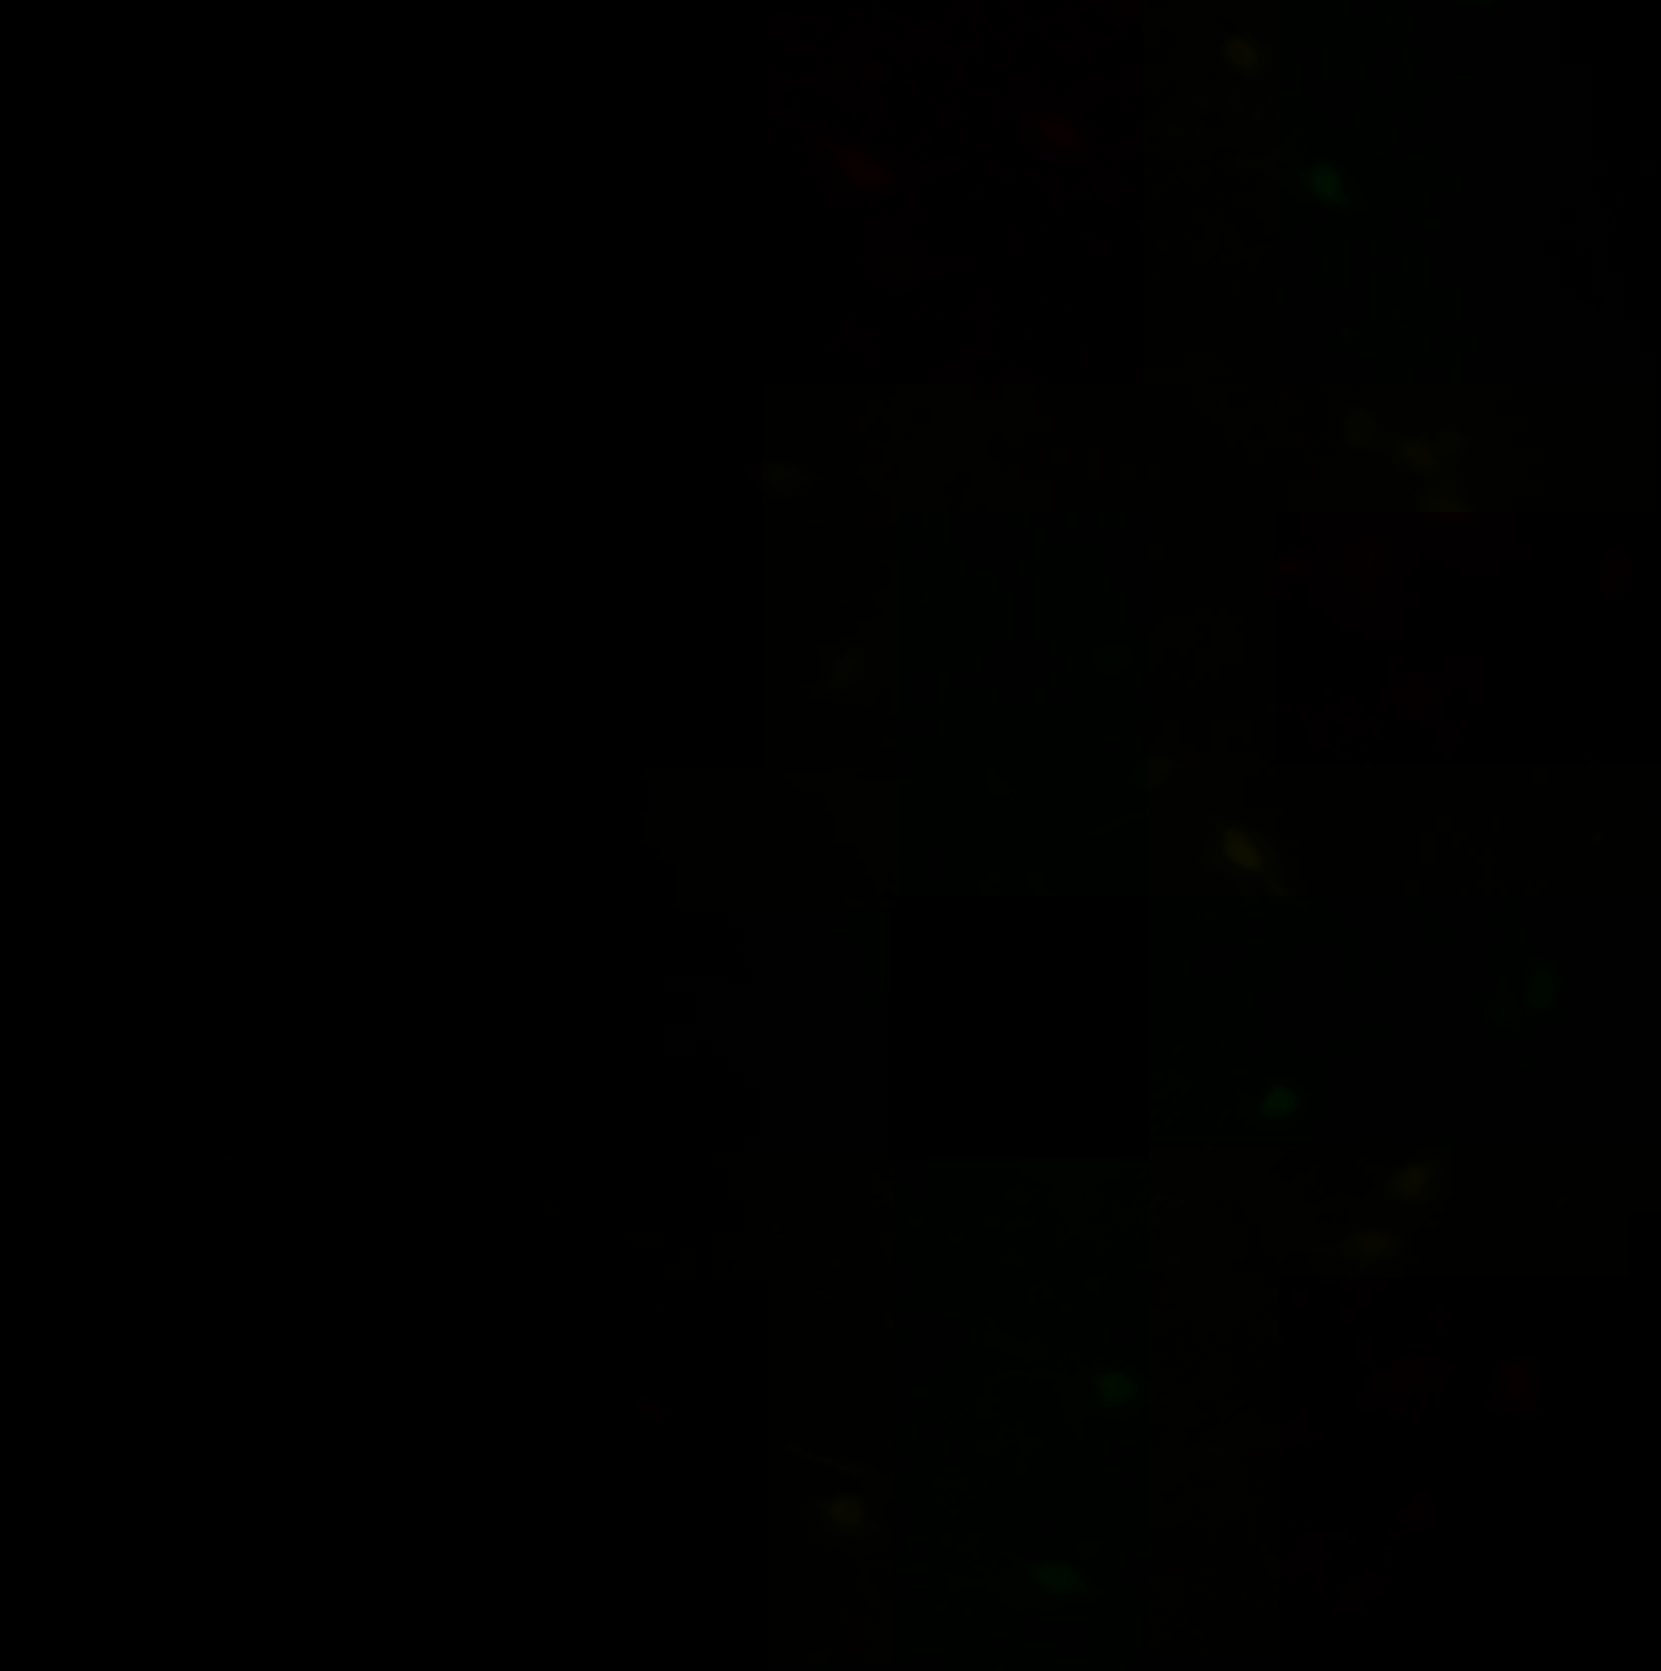